In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Doctor_Fees_Train.csv',sep='	')

In [3]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [5]:
df.shape

(5961, 7)

In [6]:
#Dropping column'Miscellaneous_Info' as it not much usefull for our analysis.
df.drop('Miscellaneous_Info',axis=1,inplace=True)

In [7]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250


In [8]:
#Checking the Data-Type
df.dtypes

Qualification    object
Experience       object
Rating           object
Place            object
Profile          object
Fees              int64
dtype: object

In [9]:
#Now we will replace missing value -by using- Simple Imputer
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
df['Rating']=imp.fit_transform(df[['Rating']])

In [10]:
df['Place']=imp.fit_transform(df[['Place']])

In [11]:
df.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
dtype: int64

# Therefore we have removed all the Null values.

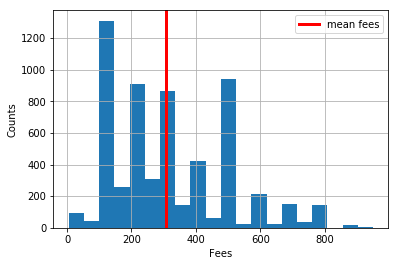

In [12]:
#Checking the mean fees.
FEES=df['Fees'].hist(bins=20)
mean_val=np.mean(df['Fees'])
plt.axvline(mean_val,linewidth=3,color='red',label='mean fees')
plt.xlabel('Fees')
plt.ylabel('Counts')
plt.legend()
plt.show()

# Therefore Mean Fees for Consulting a Doctor is 300.

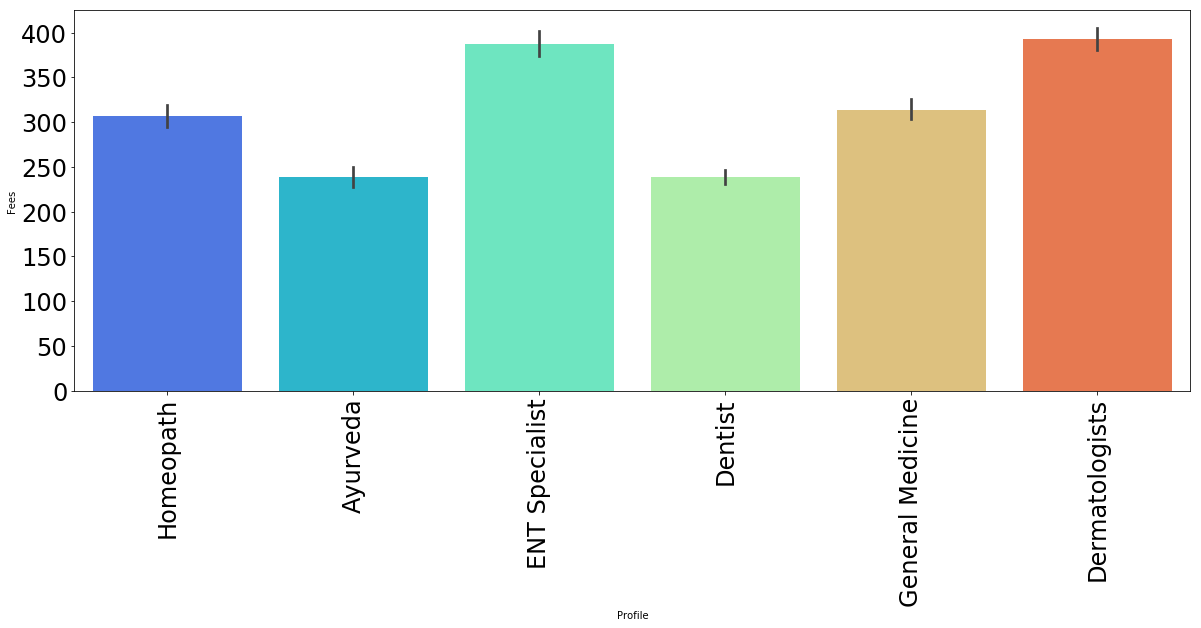

In [13]:
#FEES v/s PROFILE
plt.figure(figsize=(20,7))
sns.barplot(x='Profile',y='Fees',data=df,palette='rainbow')
plt.xticks(rotation=90,fontsize=24)
plt.yticks(fontsize=24)
plt.show()

# ENT Specialist and Dermatologists are having highest consultaion Fees.

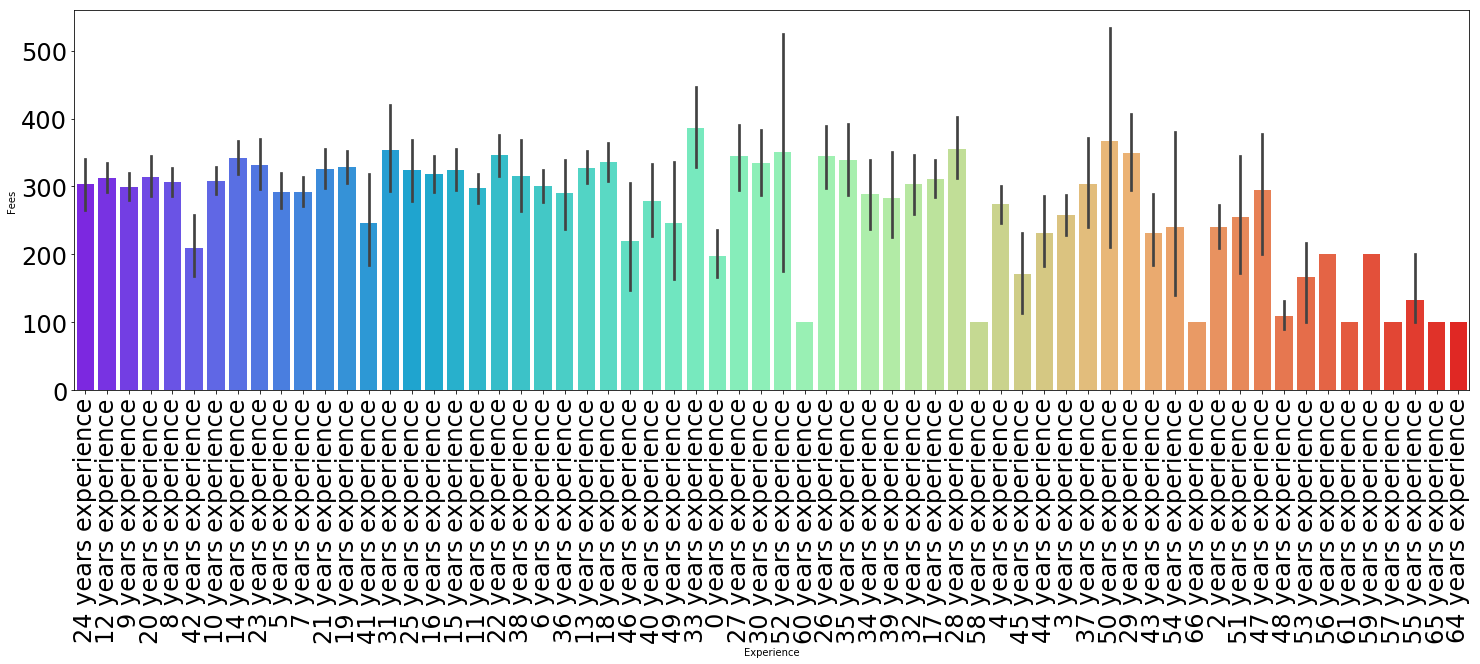

In [14]:
#FEES v/s Experience
plt.figure(figsize=(25,7))
sns.barplot(x='Experience',y='Fees',data=df,palette='rainbow')
plt.xticks(rotation=90,fontsize=24)
plt.yticks(fontsize=24)
plt.show()

# DOCTORS with more than 55 Years of Experience are charging 200 or less.

In [15]:
#Splitting the column 'Place', to find which city is most expensive interms of Fees.
df1 = pd.DataFrame(df.Place.str.split(',', 1).tolist(),
                  columns=['PLACE', 'CITY'])

In [16]:
df1.head()

,PLACE,CITY
0,Kakkanad,Ernakulam
1,Whitefield,Bangalore
2,Mathikere - BEL,Bangalore
3,Bannerghatta Road,Bangalore
4,Keelkattalai,Chennai


In [17]:
df1.shape

(5961, 2)

In [18]:
df= pd.merge(df,df1,right_index=True,left_index=True)

In [19]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees,PLACE,CITY
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda,250,Bannerghatta Road,Bangalore
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250,Keelkattalai,Chennai


In [20]:
df.shape

(5961, 8)

In [21]:
df.drop('Place',axis=1,inplace=True)

In [22]:
df.head()

,Qualification,Experience,Rating,Profile,Fees,PLACE,CITY
0,"BHMS, MD - Homeopathy",24 years experience,100%,Homeopath,100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,Ayurveda,350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,ENT Specialist,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12 years experience,100%,Ayurveda,250,Bannerghatta Road,Bangalore
4,BAMS,20 years experience,100%,Ayurveda,250,Keelkattalai,Chennai


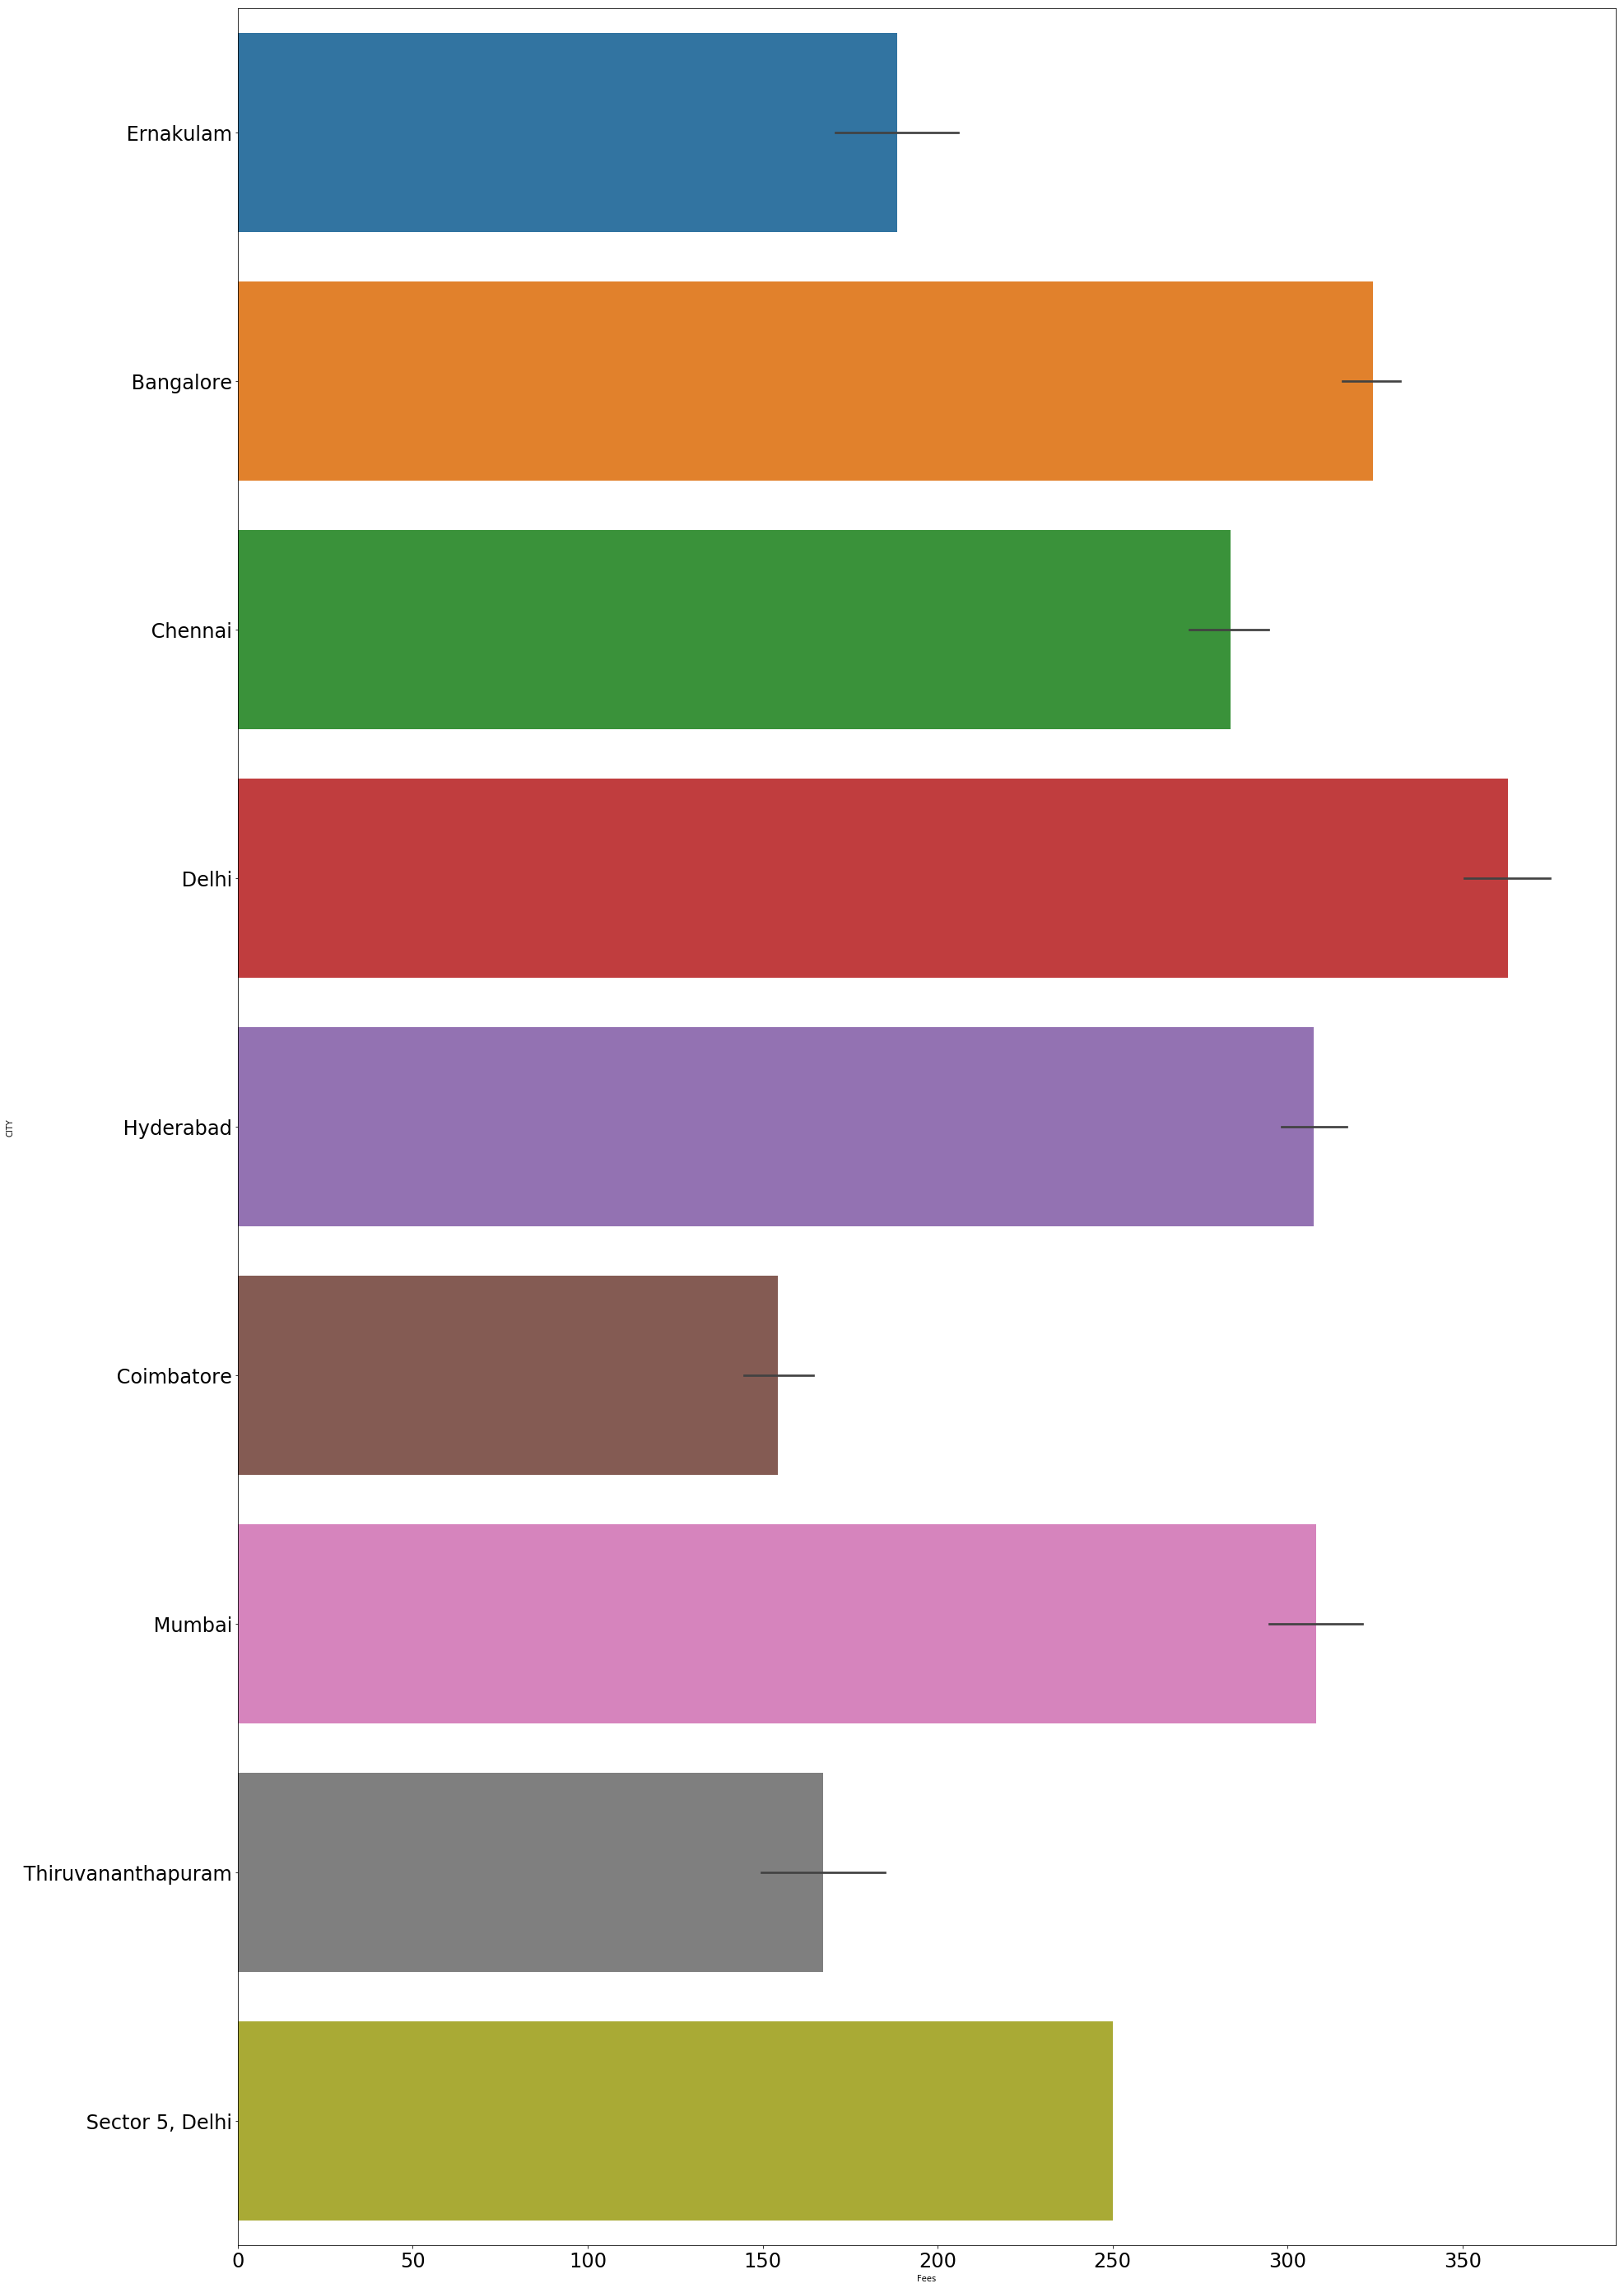

In [23]:
#CITY v/s FEES
plt.figure(figsize=(30,50))
sns.barplot(x='Fees',y='CITY',data=df,orient ='h')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()

# DELHI is having highest Doctor's Fees among all.

# Coimbatore is having lowest Doctor's Fees.

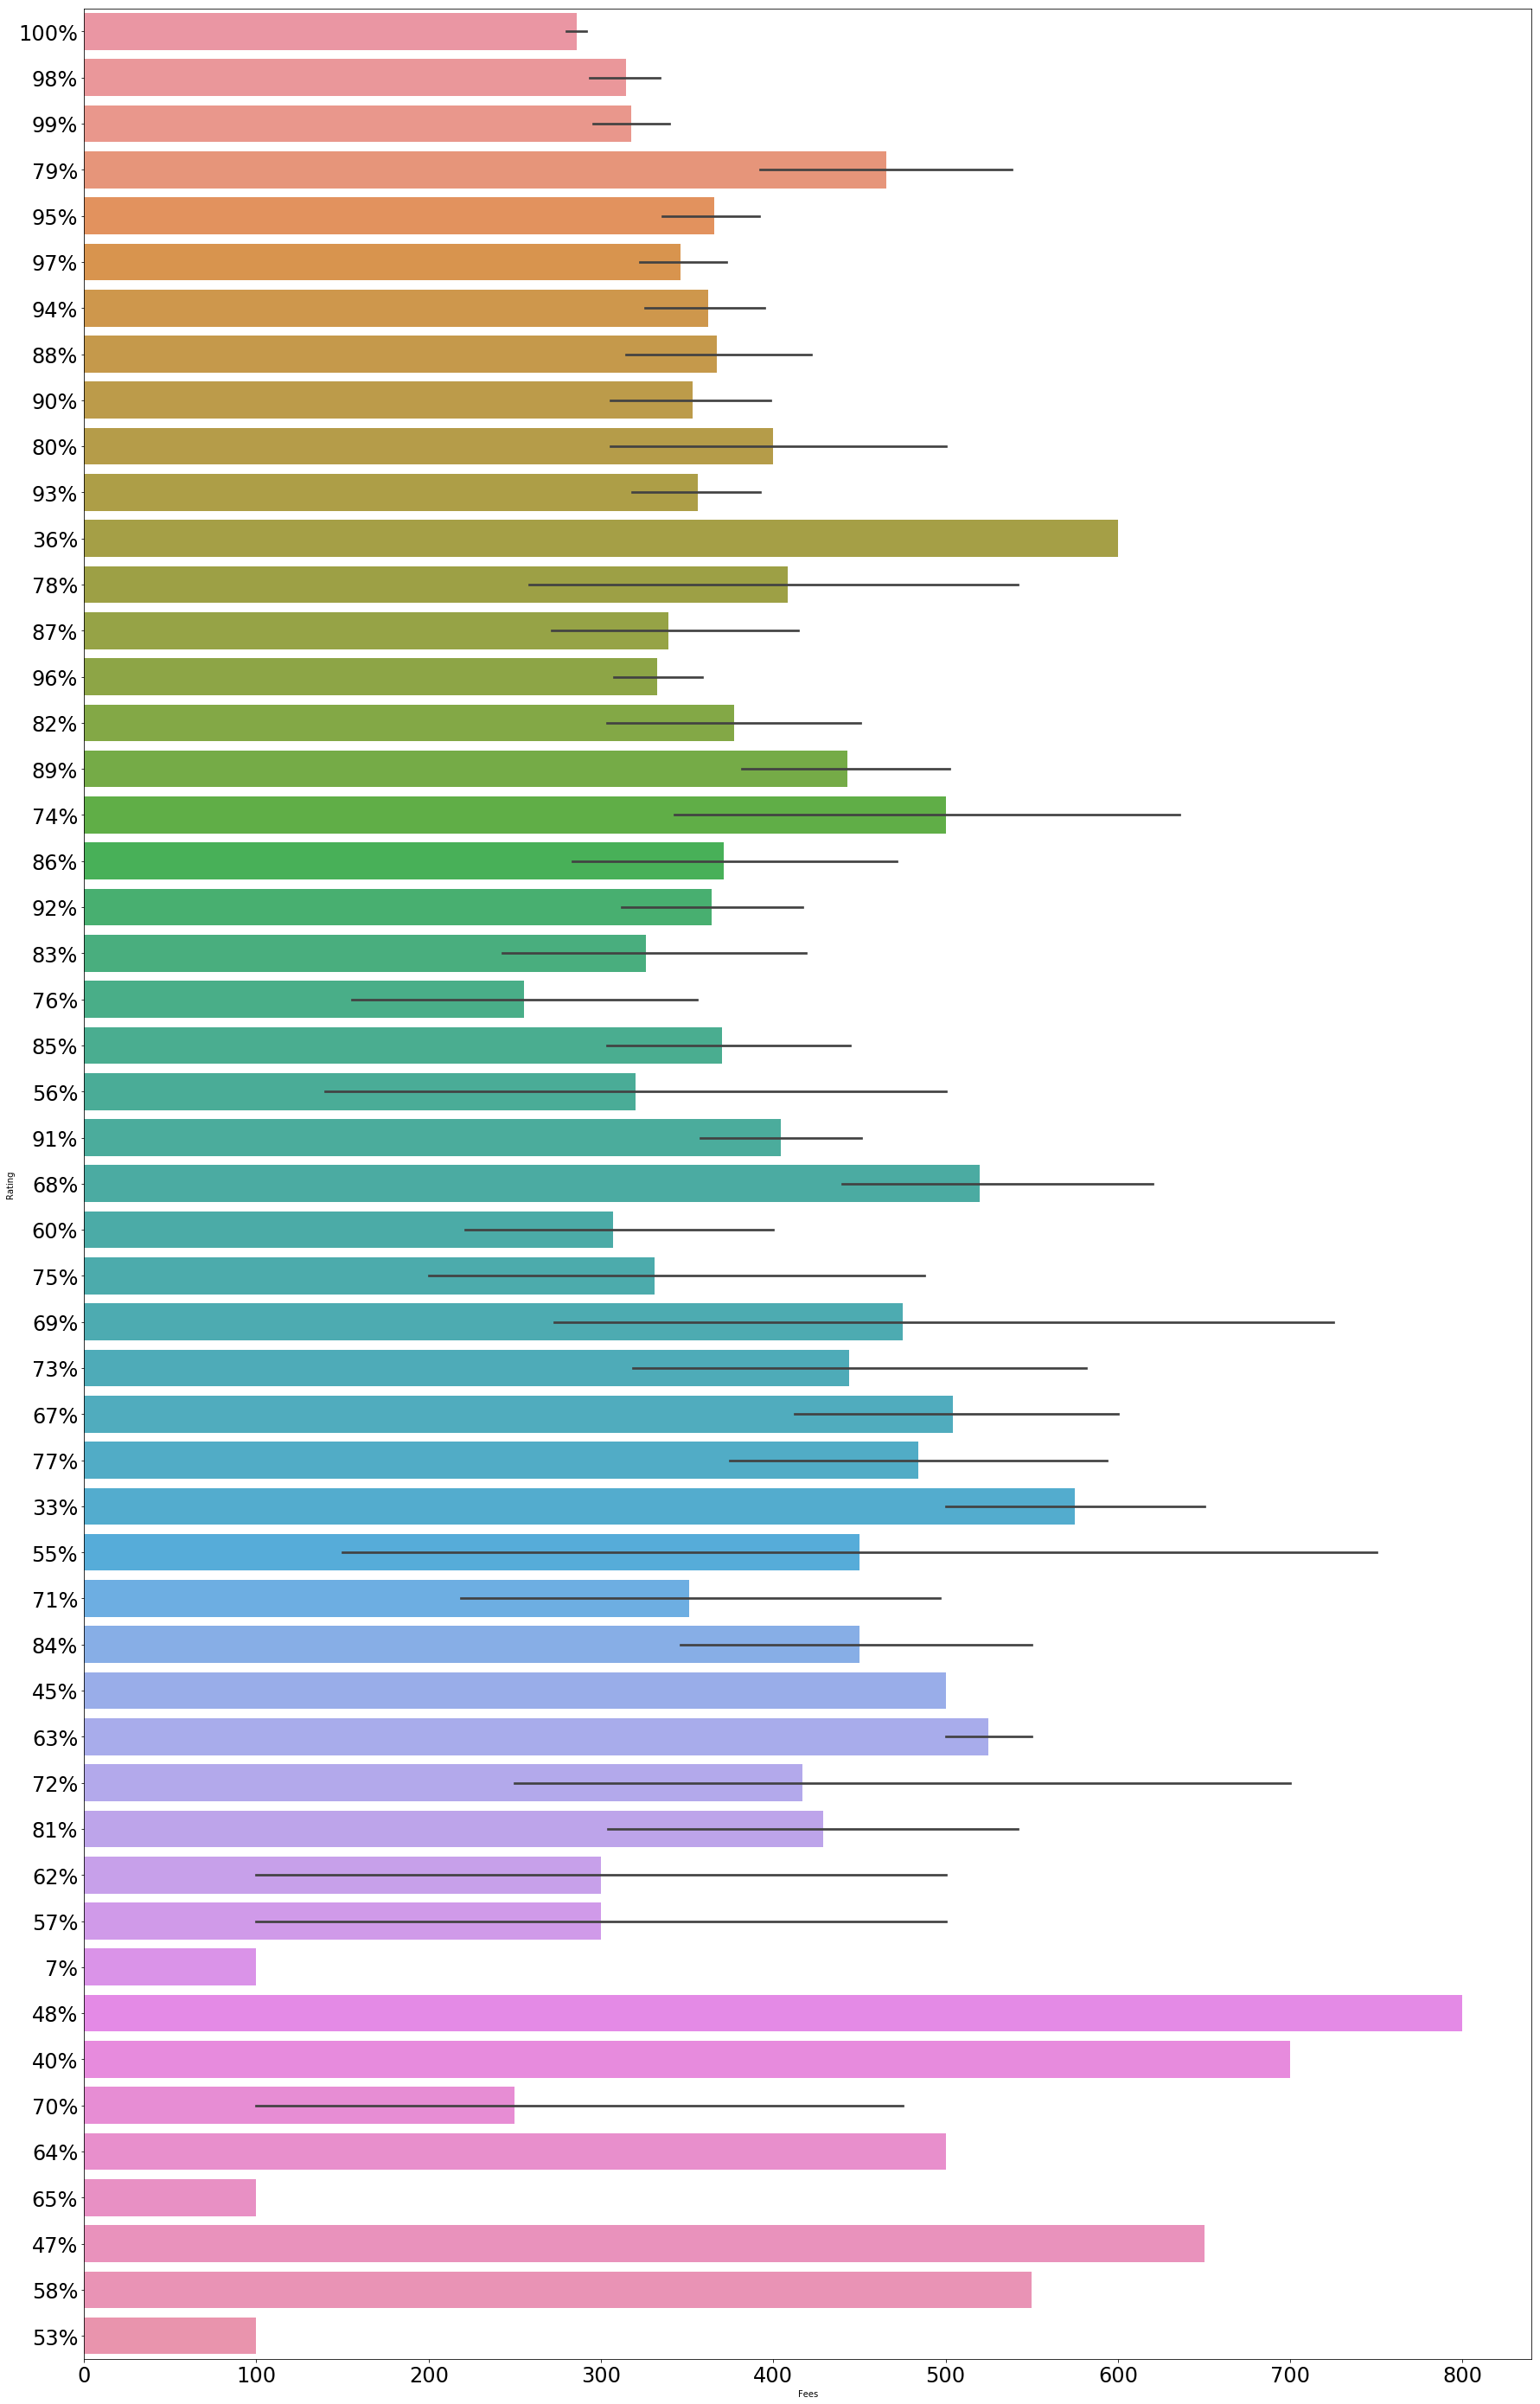

In [24]:
#FEES v/s Rating
plt.figure(figsize=(30,50))
sns.barplot(x='Fees',y='Rating',data=df,orient ='h')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()

# Doctors with 100 % Rating are charging 300 or less 'Fees'.

In [25]:
# Converting CATEGORICAL DATA into Numeric
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lis=['Qualification','Experience','Rating','CITY','Profile','PLACE']
for i in lis:
    df[i] = le.fit_transform(df[i].astype(str))

In [26]:
df.describe()

,Qualification,Experience,Rating,Profile,Fees,PLACE,CITY
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,23.010904,14.534139,2.441872,307.944640,410.120282,3.061231
std,413.842446,20.937163,21.137633,1.658014,190.920373,255.174855,2.328070
min,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,219.000000,6.000000,0.000000,1.000000,150.000000,195.000000,1.000000
50%,596.000000,15.000000,0.000000,2.000000,300.000000,404.000000,3.000000
75%,943.000000,36.000000,42.000000,4.000000,500.000000,622.000000,5.000000
max,1419.000000,63.000000,50.000000,5.000000,950.000000,865.000000,9.000000


-->Qualification is having highest Std.Deviation.                        
-->Mean Fees is 307.94                 
-->Highest Fees is 950.0                       
-->Lowest Fees is 5.0

In [27]:
#Checking for Skewness
df.skew()

Qualification    0.239720
Experience       0.823531
Rating           0.817666
Profile          0.108803
Fees             0.751870
PLACE            0.121186
CITY             0.054003
dtype: float64

# Therefore there in no skewness in our data, except TARGET(Fees).

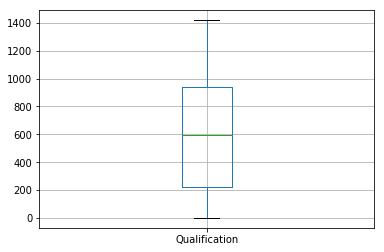

In [28]:
#Checking for OUTLIERS, in 'Qualification'
df.boxplot('Qualification')

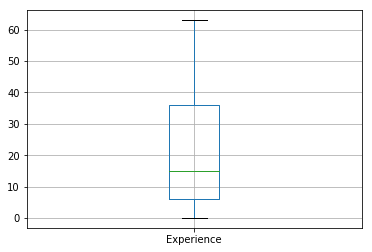

In [29]:
#Checking for OUTLIERS, in 'Experience'
df.boxplot('Experience')

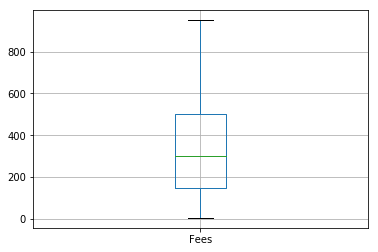

In [30]:
#Checking for OUTLIERS, in 'Fees'
df.boxplot('Fees')

In [31]:
#NOW we will remove the OUTLIERS
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.47330574, 0.33488263, 0.68765304, ..., 1.08926083, 0.44726137,
        0.40327292],
       [1.26594438, 0.95584022, 1.63068173, ..., 0.22029544, 1.74357712,
        1.31503294],
       [1.30046489, 1.91011789, 0.68765304, ..., 0.04161581, 0.16413542,
        1.31503294],
       ...,
       [0.0020724 , 0.57267077, 1.58336878, ..., 1.52985171, 0.76471739,
        0.02630354],
       [0.83648129, 0.81254231, 1.2521781 , ..., 1.08926083, 1.68478896,
        1.26242586],
       [0.85512557, 0.71701038, 0.68765304, ..., 0.56543832, 0.73242089,
        0.02630354]])

In [32]:
threshold=3
print(np.where(z>3))

(array([ 275,  293,  987, 1314, 1631, 2165, 2252, 2393, 2428, 2522, 2623,
       2708, 3365, 4040, 4581, 4730, 4835, 5195, 5250, 5311], dtype=int64), array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
      dtype=int64))


In [33]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(5961, 7)
(5941, 7)


# Therefore we have removed OUTLIERS

In [34]:
df=df_new

In [35]:
#Segregating the data for Model Training
df_x=df.drop('Fees',axis=1)
y=df['Fees']
print(df_x.shape)
print(y.shape)

(5941, 6)
(5941,)


In [36]:
#Scaling the Input
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)

In [38]:
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (4158, 6)
y_train: (4158,)
x_test: (1783, 6)
y_test: (1783,)


In [39]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
#We will try ensemble technique to boost our model
from sklearn.ensemble import RandomForestRegressor

In [40]:
#Selecting the best algorithm for our dataset
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),SVR(),KNeighborsRegressor(),Ridge(),Lasso(),ElasticNet(),DecisionTreeRegressor(),RandomForestRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=4,scoring='r2')
    print("Score of",m,"is:")
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('standard deviation:',score.std())
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) is:
Score: [0.1089575  0.07921531 0.07719123 0.10317084]
Mean Score: 0.09213371919609659
standard deviation: 0.014098056956891515


Score of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False) is:
Score: [0.07203762 0.03643027 0.05298217 0.06034969]
Mean Score: 0.0554499386544251
standard deviation: 0.01291313710385795


Score of KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform') is:
Score: [0.04189317 0.00711583 0.04966823 0.04777993]
Mean Score: 0.03661429213078482
standard deviation: 0.017270657783874478


Score of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) is:
Score: [0.10895418 0.079

In [41]:
#Now we will find the best parameters for our model
from sklearn.model_selection import GridSearchCV
Rf=RandomForestRegressor()
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
clf=GridSearchCV(Rf,parameters)
clf.fit(x,y)
clf.best_params_

{'criterion': 'mae', 'max_features': 'log2'}

In [42]:
Rf=RandomForestRegressor(criterion='mae',max_features='log2')

In [43]:
Rf.fit(x_train,y_train)
print(Rf.score(x_train,y_train))

0.7024776717233556


In [44]:
pred=Rf.predict(x_test)

In [45]:
print('Mean Absolute error:',mean_absolute_error(y_test,pred))
print('Mean Square error:',mean_squared_error(y_test,pred))
print('R2 Score:',r2_score(y_test,pred))

Mean Absolute error: 134.5888951205833
Mean Square error: 31229.164329781266
R2 Score: 0.13125905298965945


# Now we will save our BEST MODEL

In [46]:
#Saving our best MODEL
import pickle
filename='model1.pkl'
pickle.dump(Rf,open(filename,'wb'))

In [47]:
#Importing the TEST DATA
test_df=pd.read_csv('Doctor_Fees_Test.csv',sep='	')

In [48]:
test_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


# Now we have to Fill all the null values, remove unwanted column(Miscellaneous_info) & reshape 'Place'

In [49]:
#Dropping column'Miscellaneous_Info' as it not much usefull for our analysis.
test_df.drop('Miscellaneous_Info',axis=1,inplace=True)

In [50]:
#Now we will replace missing value -by using- Simple Imputer
imp=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
test_df['Rating']=imp.fit_transform(test_df[['Rating']])
test_df['Place']=imp.fit_transform(test_df[['Place']])

In [51]:
df.isnull().sum()

Qualification    0
Experience       0
Rating           0
Profile          0
Fees             0
PLACE            0
CITY             0
dtype: int64

In [52]:
#Splitting the column 'Place', to find which city is most expensive interms of Fees.
df2 = pd.DataFrame(test_df.Place.str.split(',', 1).tolist(),
                  columns=['PLACE', 'CITY'])

In [53]:
test_df= pd.merge(test_df,df2,right_index=True,left_index=True)

In [55]:
test_df.head()

,Qualification,Experience,Rating,Place,Profile,PLACE,CITY
0,MBBS,35 years experience,100%,"Ghatkopar East, Mumbai",General Medicine,Ghatkopar East,Mumbai
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,100%,"West Marredpally, Hyderabad",ENT Specialist,West Marredpally,Hyderabad
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,KK Nagar,Chennai
3,BAMS,0 years experience,100%,"New Ashok Nagar, Delhi",Ayurveda,New Ashok Nagar,Delhi
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,Kanakpura Road,Bangalore


In [56]:
test_df.drop('Place',axis=1,inplace=True)

In [57]:
# Converting CATEGORICAL DATA into Numeric
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lis=['Qualification','Experience','Rating','CITY','Profile','PLACE']
for i in lis:
    test_df[i] = le.fit_transform(test_df[i].astype(str))

In [58]:
test_df.head()

,Qualification,Experience,Rating,Profile,PLACE,CITY
0,241,28,0,4,142,6
1,340,24,0,3,577,5
2,258,34,9,2,212,1
3,6,0,0,0,373,3
4,79,7,0,1,231,0


In [59]:
#NOW we will remove the OUTLIERS
from scipy.stats import zscore
z1=np.abs(zscore(test_df))
z1

array([[0.1020893 , 0.32585765, 0.68687215, 0.90167305, 0.84334559,
        1.30991115],
       [0.43041389, 0.11273087, 0.68687215, 0.29700739, 1.66563462,
        0.86861012],
       [0.01064936, 0.64554782, 0.05553299, 0.30765827, 0.43960165,
        0.89659398],
       ...,
       [1.1511758 , 1.81774509, 0.68687215, 0.90167305, 0.77739794,
        0.89659398],
       [1.12406513, 1.00618471, 1.69818689, 0.91232393, 1.51240698,
        1.33789501],
       [0.66708198, 1.7644634 , 0.68687215, 0.30765827, 0.60436483,
        0.89659398]])

In [61]:
threshold=3
print(np.where(z1>3))

(array([], dtype=int64), array([], dtype=int64))


# NO OUTLIERS

In [62]:
#Loading our best saved MODEL for PREDICTION PHASE
fitted_model=pickle.load(open("model1.pkl",'rb'))

In [63]:
fitted_model

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [64]:
#Prediction on TEST DATA
pred2=fitted_model.predict(test_df)

In [65]:
pred2

array([418., 418., 470., ..., 483., 365., 483.])